## Predecir la mora en clientes de una entidad financiera

### Importamos los datos

In [1]:
import os

os.chdir('C:\\Users\\caleb.terrel\\Desktop\\3-Python_para_machine_learning\\datasets')
os.getcwd()

'C:\\Users\\caleb.terrel\\Desktop\\3-Python_para_machine_learning\\datasets'

In [2]:
import pandas as pd

bank = pd.read_csv('bankloan1.csv')
bank.head()

,edad,educ,empleo,direccion,ingresos,deudaingr,deudacred,deudaotro,impago
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


### Seleccionar a las variables X e Y

In [3]:
bank.columns

Index(['edad', 'educ', 'empleo', 'direccion', 'ingresos', 'deudaingr',
       'deudacred', 'deudaotro', 'impago'],
      dtype='object')

In [4]:
X = bank.drop(['impago'], axis=1)
X.head()

,edad,educ,empleo,direccion,ingresos,deudaingr,deudacred,deudaotro
0,41,3,17,12,176,9.3,11.359392,5.008608
1,27,1,10,6,31,17.3,1.362202,4.000798
2,40,1,15,14,55,5.5,0.856075,2.168925
3,41,1,15,14,120,2.9,2.658720,0.821280
4,24,2,2,0,28,17.3,1.787436,3.056564


In [5]:
# Seleccionar la variable Y

y = bank[['impago']]
y.head()

,impago
0,1
1,0
2,0
3,0
4,1


### Dividir los datos en train y test

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2021)

print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)

print("X_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (404, 8)
y_train.shape:  (404, 1)
X_test.shape:  (174, 8)
y_test.shape:  (174, 1)


## Arbol decisión

In [7]:
from sklearn import tree

In [8]:
modelo = tree.DecisionTreeClassifier(criterion='entropy', random_state=2021,
                                      max_depth=5, min_samples_leaf=20, min_samples_split=40)
modelo = modelo.fit(X_train, y_train)
modelo

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=20,
                       min_samples_split=40, random_state=2021)

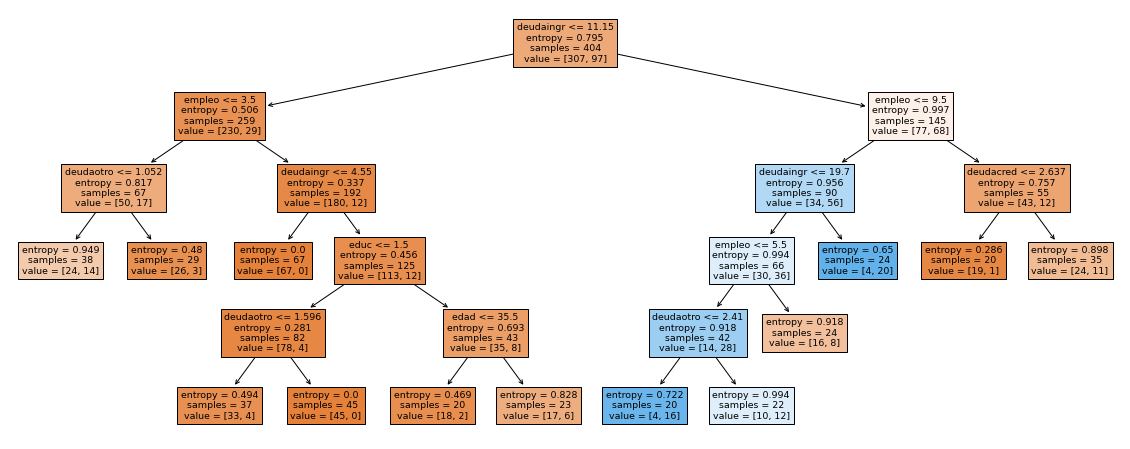

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))

tree.plot_tree(modelo, feature_names = X_train.columns, filled=True);

## Evaluacion del modelo

In [10]:
print("accuracy train: ", modelo.score(X_train, y_train))
print("accuracy test: ", modelo.score(X_test, y_test))

accuracy train:  0.8341584158415841
accuracy test:  0.7471264367816092


In [11]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = modelo.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[108  17]
 [ 27  22]]


              precision    recall  f1-score   support

           0       0.80      0.86      0.83       125
           1       0.56      0.45      0.50        49

    accuracy                           0.75       174
   macro avg       0.68      0.66      0.67       174
weighted avg       0.73      0.75      0.74       174

